# Brain_stroke_prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing Data

In [2]:
df_raw= pd.read_csv('full_data.csv')

In [3]:
df=df_raw.copy()

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [7]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Data Processing

### Gender

In [8]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
df['gender']=df['gender'].map({'Male':0, 'Female':1})

### ever_married 

In [10]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
df['ever_married']=df['ever_married'].map({'Yes':1, 'No':2})

### work_type

In [12]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [13]:
work_type=pd.get_dummies(df['work_type'],drop_first=True)

In [14]:
df=pd.concat([df,work_type],axis=1)

In [15]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Private,Self-employed,children
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1,1,0,0
1,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1,1,0,0
2,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1,1,0,0
3,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,0
4,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1,1,0,0


### Residence_type

In [16]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [17]:
df['Residence_type']=df['Residence_type'].map({'Urban':1, 'Rural':0})

In [18]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Private,Self-employed,children
0,0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,1,0,0
1,0,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,1,0,0
2,1,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,1,0,0
3,1,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,0,1,0
4,0,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1,1,0,0


In [19]:
df.drop(['work_type','smoking_status'],axis=1,inplace=True)

In [20]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Private,Self-employed,children
0,0,67.0,0,1,1,1,228.69,36.6,1,1,0,0
1,0,80.0,0,1,1,0,105.92,32.5,1,1,0,0
2,1,49.0,0,0,1,1,171.23,34.4,1,1,0,0
3,1,79.0,1,0,1,0,174.12,24.0,1,0,1,0
4,0,81.0,0,0,1,1,186.21,29.0,1,1,0,0


## EDA

<AxesSubplot:xlabel='age', ylabel='count'>

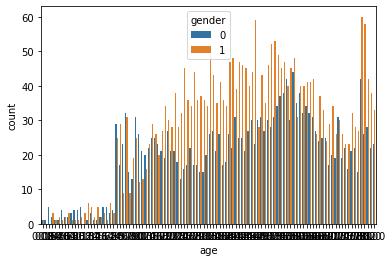

In [21]:
sns.countplot(df['age'],hue=df['gender'])

<AxesSubplot:xlabel='gender', ylabel='count'>

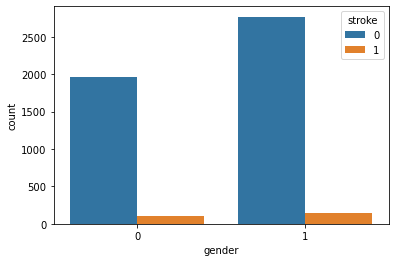

In [22]:
sns.countplot(df['gender'],hue=df['stroke'])

<AxesSubplot:xlabel='hypertension', ylabel='count'>

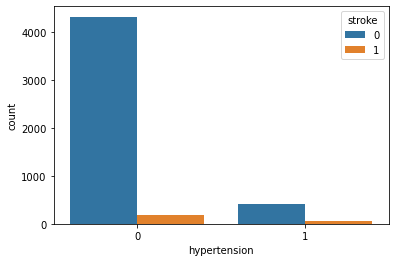

In [23]:
sns.countplot(df['hypertension'],hue=df['stroke'])

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

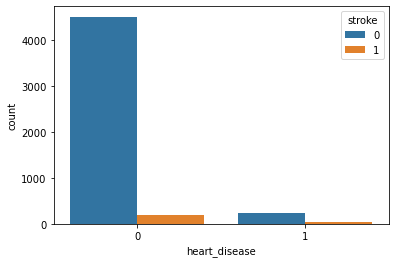

In [24]:
sns.countplot(df['heart_disease'],hue=df['stroke'])

<AxesSubplot:xlabel='ever_married', ylabel='count'>

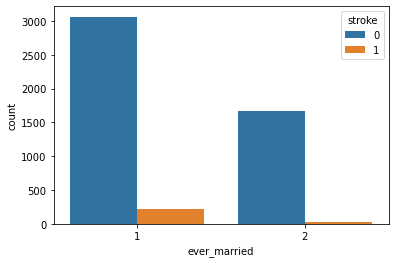

In [25]:
sns.countplot(df['ever_married'],hue=df['stroke'])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

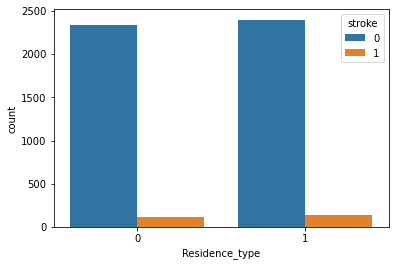

In [26]:
sns.countplot(df['Residence_type'],hue=df['stroke'])

<AxesSubplot:xlabel='stroke', ylabel='count'>

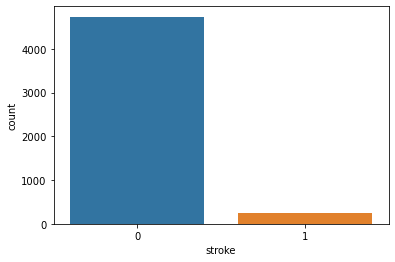

In [27]:
sns.countplot(df['stroke'])

<AxesSubplot:xlabel='age'>

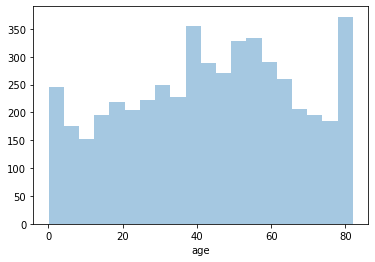

In [28]:
sns.distplot(df['age'],kde=False)

<AxesSubplot:xlabel='avg_glucose_level'>

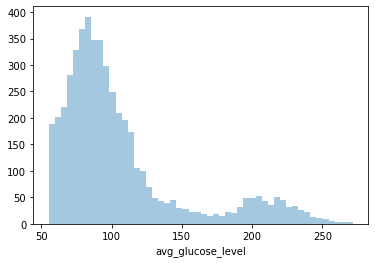

In [29]:
sns.distplot(df['avg_glucose_level'],kde=False)

<AxesSubplot:xlabel='bmi'>

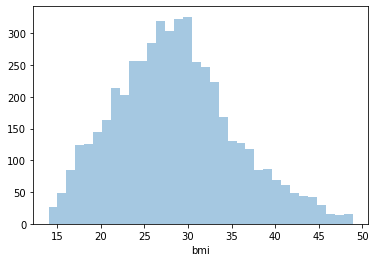

In [30]:
sns.distplot(df['bmi'],kde=False)

<AxesSubplot:>

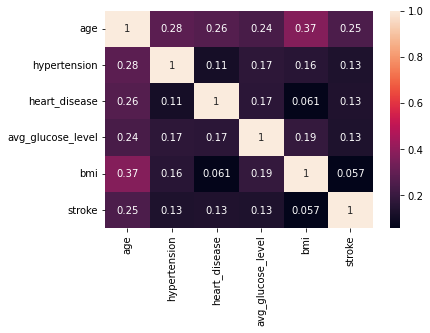

In [31]:
sns.heatmap(df_raw.corr(),annot=True)

# Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X=df.drop('stroke',axis=1)
y=df['stroke']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Min Max

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
sc=MinMaxScaler()

In [37]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Model

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

In [39]:
M1=LogisticRegression()
M1.fit(X_train,y_train)
P1=M1.predict(X_test)
print(classification_report(y_test,P1))
print('\n')
print(confusion_matrix(y_test,P1))
print('\n')
print(accuracy_score(y_test,P1))
print('\n')
print(roc_auc_score(y_test,P1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



[[943   0]
 [ 54   0]]


0.9458375125376128


0.5


## Imbalenced Data

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
smote=SMOTE(k_neighbors=3)

In [42]:
X_smt,y_smt=smote.fit_resample(X_train,y_train)

<AxesSubplot:xlabel='stroke', ylabel='count'>

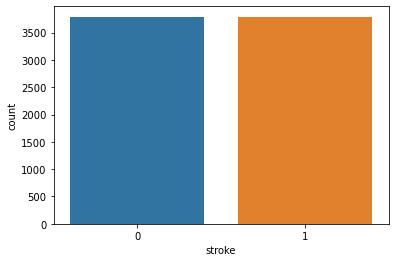

In [43]:
sns.countplot(y_smt)

In [44]:
M1=LogisticRegression()
M1.fit(X_smt,y_smt)
P1=M1.predict(X_test)
print(classification_report(y_test,P1))
print('\n')
print(confusion_matrix(y_test,P1))
print('\n')
print(accuracy_score(y_test,P1))
print('\n')
print(roc_auc_score(y_test,P1))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84       943
           1       0.15      0.83      0.26        54

    accuracy                           0.74       997
   macro avg       0.57      0.78      0.55       997
weighted avg       0.94      0.74      0.81       997



[[691 252]
 [  9  45]]


0.7382146439317954


0.7830505478967834


## Random_Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
M2=RandomForestClassifier()
M2.fit(X_smt,y_smt)
P2=M2.predict(X_test)
print(classification_report(y_test,P2))
print('\n')
print(confusion_matrix(y_test,P2))
print('\n')
print(accuracy_score(y_test,P2))
print('\n')
print(roc_auc_score(y_test,P2))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       943
           1       0.05      0.07      0.06        54

    accuracy                           0.87       997
   macro avg       0.50      0.49      0.49       997
weighted avg       0.90      0.87      0.88       997



[[863  80]
 [ 50   4]]


0.8696088264794383


0.4946192215545343


## Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
M3=DecisionTreeClassifier()
M3.fit(X_smt,y_smt)
P3=M3.predict(X_test)
print(classification_report(y_test,P3))
print('\n')
print(confusion_matrix(y_test,P3))
print('\n')
print(accuracy_score(y_test,P3))
print('\n')
print(roc_auc_score(y_test,P3))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       943
           1       0.05      0.09      0.07        54

    accuracy                           0.86       997
   macro avg       0.50      0.50      0.50       997
weighted avg       0.90      0.86      0.88       997



[[857  86]
 [ 49   5]]


0.8645937813440321


0.500697144652606


 # knn

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
M4=KNeighborsClassifier(n_neighbors=2)
M4.fit(X_smt,y_smt)
P4=M4.predict(X_test)
print(classification_report(y_test,P4))
print('\n')
print(confusion_matrix(y_test,P4))
print('\n')
print(accuracy_score(y_test,P4))
print('\n')
print(roc_auc_score(y_test,P4))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       943
           1       0.03      0.06      0.04        54

    accuracy                           0.86       997
   macro avg       0.49      0.48      0.48       997
weighted avg       0.89      0.86      0.88       997



[[859  84]
 [ 51   3]]


0.8645937813440321


0.48323907152115


## Naive_bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
M5=GaussianNB()
M5.fit(X_smt,y_smt)
P5=M5.predict(X_test)
print(classification_report(y_test,P5))
print('\n')
print(confusion_matrix(y_test,P5))
print('\n')
print(accuracy_score(y_test,P5))
print('\n')
print(roc_auc_score(y_test,P5))

              precision    recall  f1-score   support

           0       0.99      0.53      0.69       943
           1       0.10      0.93      0.18        54

    accuracy                           0.55       997
   macro avg       0.55      0.73      0.44       997
weighted avg       0.94      0.55      0.67       997



[[503 440]
 [  4  50]]


0.5546639919759278


0.7296649778091985


## SVM

In [53]:
from sklearn.svm import SVC

In [54]:
M6=SVC()
M6.fit(X_smt,y_smt)
P6=M6.predict(X_test)
print(classification_report(y_test,P6))
print('\n')
print(confusion_matrix(y_test,P6))
print('\n')
print(accuracy_score(y_test,P6))
print('\n')
print(roc_auc_score(y_test,P6))

              precision    recall  f1-score   support

           0       0.96      0.75      0.85       943
           1       0.10      0.50      0.17        54

    accuracy                           0.74       997
   macro avg       0.53      0.63      0.51       997
weighted avg       0.92      0.74      0.81       997



[[711 232]
 [ 27  27]]


0.7402206619859579


0.6269883351007423


## GB Boosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
M7=GradientBoostingClassifier()
M7.fit(X_smt,y_smt)
P7=M7.predict(X_test)
print(classification_report(y_test,P7))
print('\n')
print(confusion_matrix(y_test,P7))
print('\n')
print(accuracy_score(y_test,P7))
print('\n')
print(roc_auc_score(y_test,P7))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       943
           1       0.13      0.52      0.21        54

    accuracy                           0.79       997
   macro avg       0.55      0.66      0.55       997
weighted avg       0.92      0.79      0.84       997



[[761 182]
 [ 26  28]]


0.7913741223671013


0.6627587290365656
